<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.7/546.7 kB 13.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2024-12-29 13:17:17
-------------------
qualified stocks: 88
with latest results: 84
still star stocks: 42
-------------------
Initial Investment:  1.03 C
CY Investment:  1.16 C
Reserve:  3.10 K
Current:  1.18 C
-------------------
Today PnL: -177.00 (-0.0%)
Current PnL: -8.59 L (-7.39%)
CY Booked + Current PnL: 2.07 L (1.78%)
-------------------
Total profit:  5.73 L
Total loss:  -14.32 L
-------------------
Total Booked + Current PnL: 15.18 L (14.74%)
Total Booked PnL: 23.77 L (23.07%)
Curr Year Booked PnL: 10.66 L (9.0%)
Prev Year Booked PnL: 13.11 L (12.73%)
Est FTT:  1.89 C
Est FTT PnL: 70.82 L (59.79%)
-------------------
Est LTT:  2.47 C
Est LTT PnL: 1.29 C (108.62%)
Deployed:  1.03 C
Current:  1.18 C
CAGR/XIRR %: 12.34%


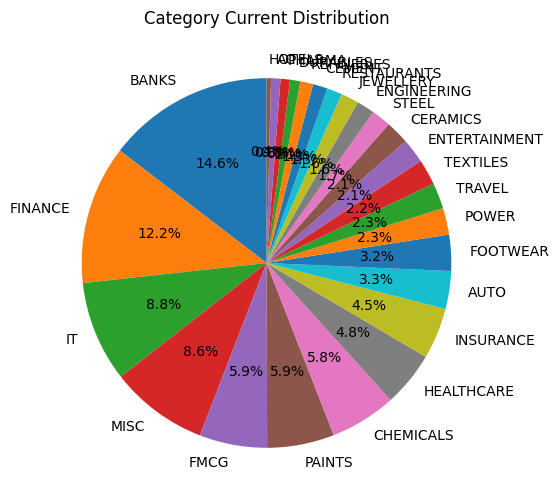

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'Close', 'FTT', 'Dev%_PE', 'MBQ', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,Close,FTT,Dev%_PE,MBQ,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
29,GLAND,1810.65,2114.00,6.68,4.0,90.91,97775.0,18722.0,16377.0,-0.75,23.68,16.75,44.40,29.0,1.14,0.83,12.75,XR,NTT,PHARMA
15,BAYERCROP,5799.95,6836.59,25.10,4.5,81.82,92799.0,23254.0,16583.0,0.01,33.44,17.87,57.29,21.0,1.40,0.78,18.81,X40N,ATH,CHEMICALS
12,BANKBARODA,244.99,288.89,-22.51,3.0,70.45,96771.0,19454.0,17341.0,-0.69,25.16,17.92,47.59,19.0,1.12,0.82,13.23,XR,ATH,BANKS
47,LALPATHLAB,2948.70,3450.00,-14.64,4.5,55.68,106153.0,15437.0,18046.0,-0.20,17.02,17.00,36.91,19.0,0.86,0.90,47.49,X40N,NTT,HEALTHCARE
87,VIPIND,477.65,575.00,-315.77,5.0,53.41,93142.0,-2174.0,18982.0,2.01,-2.28,20.38,17.64,-7.0,-0.11,0.79,10.54,X40N,NTT,MISC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,SAIL,115.53,228.00,55.68,3.0,68.18,198943.0,-26019.0,193671.0,-1.75,-11.57,97.35,74.53,6.0,-0.13,1.68,7.85,XY24,BTT,STEEL
58,RBLBANK,159.86,388.00,-40.96,3.0,78.41,162418.0,-71882.0,231787.0,-1.57,-30.68,142.71,68.25,-50.0,-0.31,1.37,5.09,XY24,NTT,BANKS
11,BANDHANBNK,160.79,400.00,-42.52,3.5,27.27,176387.0,-62254.0,262411.0,-0.42,-26.09,148.77,83.87,-25.0,-0.24,1.49,1.09,XY24,NTT,BANKS
75,TANLA,676.70,2007.31,-40.02,4.0,48.86,149551.0,-69584.0,294062.0,0.36,-31.75,196.63,102.44,-32.0,-0.24,1.26,1.81,AR,ATH,IT


In [5]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Close,FTT,Dev%_PE,MBQ,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
29,GLAND,1810.65,2114.00,6.68,4.0,90.91,97775.0,18722.0,16377.0,-0.75,23.68,16.75,44.40,29.0,1.14,0.83,12.75,XR,NTT,PHARMA
15,BAYERCROP,5799.95,6836.59,25.10,4.5,81.82,92799.0,23254.0,16583.0,0.01,33.44,17.87,57.29,21.0,1.40,0.78,18.81,X40N,ATH,CHEMICALS
12,BANKBARODA,244.99,288.89,-22.51,3.0,70.45,96771.0,19454.0,17341.0,-0.69,25.16,17.92,47.59,19.0,1.12,0.82,13.23,XR,ATH,BANKS
47,LALPATHLAB,2948.70,3450.00,-14.64,4.5,55.68,106153.0,15437.0,18046.0,-0.20,17.02,17.00,36.91,19.0,0.86,0.90,47.49,X40N,NTT,HEALTHCARE
87,VIPIND,477.65,575.00,-315.77,5.0,53.41,93142.0,-2174.0,18982.0,2.01,-2.28,20.38,17.64,-7.0,-0.11,0.79,10.54,X40N,NTT,MISC
20,CLEAN,1422.55,1683.00,-7.86,3.5,96.59,116649.0,2690.0,21358.0,1.40,2.36,18.31,21.10,2.0,0.13,0.98,11.50,XR,NTT,CHEMICALS
70,SIS,369.60,528.00,74.50,4.0,57.95,62832.0,-18258.0,26930.0,-0.12,-22.52,42.86,10.69,-21.0,-0.68,0.53,0.71,X40N,NTT,MISC
76,TATAELXSI,6886.35,9000.00,-11.78,5.0,82.95,96409.0,-6243.0,29588.0,-0.14,-6.08,30.69,22.74,-5.0,-0.21,0.81,8.03,X40N,NTT,IT
19,CERA,7192.75,10420.45,-7.15,5.0,73.86,71928.0,-18671.0,32274.0,-0.22,-20.61,44.87,15.02,-51.0,-0.58,0.61,9.20,X40N,ATH,CERAMICS
81,TRIDENT,33.17,48.00,69.40,4.0,80.68,81930.0,-10324.0,36631.0,-0.51,-11.19,44.71,28.51,-11.0,-0.28,0.69,6.11,XR,NTT,TEXTILES


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XY24') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Close,FTT,Dev%_PE,MBQ,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
42,JIOFIN,304.95,387.0,-8.53,4.0,19.32,150645.0,-7554.0,40539.0,-0.20,-4.77,26.91,20.85,65.0,-0.19,1.27,30.04,XY24,BTT,FINANCE
18,CAMPUS,315.80,393.0,2.67,3.5,97.73,179690.0,11915.0,43934.0,4.17,7.10,24.45,33.28,18.0,0.27,1.52,47.23,XY24,NTT,FOOTWEAR
28,GICRE,473.20,583.0,19.87,3.0,98.86,206788.0,60367.0,47975.0,1.66,41.23,23.20,74.00,137.0,1.26,1.75,59.84,XY24,BTT,INSURANCE
84,UNIONBANK,117.87,163.0,-13.17,3.0,46.59,134018.0,-6822.0,51315.0,-0.99,-4.84,38.29,31.59,-20.0,-0.13,1.13,8.90,XY24,NTT,BANKS
23,DABUR,507.15,735.0,-9.73,5.0,52.27,129323.0,-2859.0,58105.0,0.31,-2.16,44.93,41.79,-3.0,-0.05,1.09,3.38,XY24,BTT,FMCG
54,NHPC,80.33,115.0,186.62,3.0,54.55,138007.0,-3006.0,59564.0,-2.08,-2.13,43.16,40.11,-85.0,-0.05,1.17,23.93,XY24,NTT,POWER
52,MEDANTA,1090.40,1486.0,-2.10,4.0,79.55,165741.0,10306.0,60131.0,-1.56,6.63,36.28,45.32,30.0,0.17,1.40,15.44,XY24,NTT,HEALTHCARE
43,JPPOWER,18.13,26.2,-62.10,3.0,87.50,137298.0,-4544.0,61111.0,-0.00,-3.20,44.51,39.88,85.0,-0.07,1.16,22.92,XY24,NTT,POWER
77,TATAMOTORS,750.50,1065.0,-56.89,4.0,43.18,153852.0,-9906.0,64479.0,1.31,-6.05,41.91,33.32,-70.0,-0.15,1.30,3.92,XY24,NTT,AUTO
80,TITAGARH,1148.35,1548.0,4.01,4.0,39.77,187181.0,5035.0,65139.0,-2.18,2.76,34.80,38.53,14.0,0.08,1.58,39.46,XY24,NTT,ENGINEERING


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'].isin(['AR','XR','SR'])) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,Close,FTT,Dev%_PE,MBQ,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
29,GLAND,1810.65,2114.00,6.68,4.0,90.91,97775.0,18722.0,16377.0,-0.75,23.68,16.75,44.40,29.0,1.14,0.83,12.75,XR,NTT,PHARMA
12,BANKBARODA,244.99,288.89,-22.51,3.0,70.45,96771.0,19454.0,17341.0,-0.69,25.16,17.92,47.59,19.0,1.12,0.82,13.23,XR,ATH,BANKS
20,CLEAN,1422.55,1683.00,-7.86,3.5,96.59,116649.0,2690.0,21358.0,1.40,2.36,18.31,21.10,2.0,0.13,0.98,11.50,XR,NTT,CHEMICALS
44,JUBLFOOD,708.10,850.00,-0.73,4.0,95.45,158614.0,49448.0,31786.0,0.60,45.30,20.04,74.41,28.0,1.56,1.34,64.63,AR,NTT,RESTAURANTS
81,TRIDENT,33.17,48.00,69.40,4.0,80.68,81930.0,-10324.0,36631.0,-0.51,-11.19,44.71,28.51,-11.0,-0.28,0.69,6.11,XR,NTT,TEXTILES
51,MASFIN,271.25,401.09,-26.43,4.0,50.00,81375.0,-16605.0,38954.0,0.15,-16.95,47.87,22.81,-74.0,-0.43,0.69,3.33,XR,ATH,FINANCE
48,LAOPALA,320.05,464.00,-15.29,4.0,75.00,87374.0,-13472.0,39301.0,-0.44,-13.36,44.98,25.61,-41.0,-0.34,0.74,8.88,AR,NTT,CERAMICS
36,IEX,180.62,219.00,-2.10,4.0,92.05,202114.0,52851.0,42949.0,0.25,35.41,21.25,64.18,28.0,1.23,1.71,37.03,XR,NTT,MISC
17,BSOFT,576.05,844.81,-0.04,4.0,45.45,100809.0,-9240.0,47037.0,1.02,-8.40,46.66,34.34,-22.0,-0.20,0.85,5.62,XR,ATH,IT
38,INDUSINDBK,953.40,1800.00,-36.67,4.0,36.36,54344.0,-22862.0,48257.0,2.30,-29.61,88.80,32.89,-21.0,-0.47,0.46,2.58,XR,NTT,BANKS


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.81
1,20,34.51
2,30,47.86


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,41.16
X40,20.05
X40N,14.84
XR,14.56
AR,6.52
X200,1.44
SR,1.43


In [10]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.58,-10.48,62.92
FINANCE,12.15,-13.52,61.32
IT,8.79,-6.72,60.36
MISC,8.58,0.24,33.91
FMCG,5.92,-4.49,45.21
PAINTS,5.87,-18.33,53.35
CHEMICALS,5.78,-5.72,67.07
HEALTHCARE,4.81,8.57,37.66
INSURANCE,4.48,8.66,40.61
